<a href="https://colab.research.google.com/github/limjunghyeon/ESAA_py/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(3)_3%EC%A1%B0__%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **[ 미니 프로젝트 (3) ]**
### **8기 3조 - 서혜현, 곽지수, 임정현, 서유진, 이인서**

- 과제 : 미니 프로젝트(1)에 이어서, 한 학기동안 배운 회귀 모델들 중 하나 이상을 해당 데이터에 적합.

- 조건 : 하이퍼 파라미터 튜닝 포함

-  분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 점수 고득점자 1위 조원분들께는 우수학회원 점수 가산(1위 조 전원 +3점)이 있을 예정입니다.

- 제출기한 : 2023.6.30 (금) 23:59

- 관련 사이트: https://dacon.io/competitions/open/235536/codeshare

**<변수 소개>**
* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
*box_off_num : 관객수


#01. 필요한 모듈 불러오기

In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (20.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지
import re

import warnings
warnings.filterwarnings('ignore')

#02. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/movies_train.csv")
test = pd.read_csv('/content/movies_test.csv')
submission = pd.read_csv('/content/submission.csv')

# 03. 데이터 분석

1) 데이터 확인

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
# 데이터 형태 확인
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [ ]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
# 데이터의 기술 통계량 확인
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
# 데이터의 상관계수 확인
pd.reset_option('display.float_format')

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


<Axes: title={'center': 'Pearson Correalation of Features'}>

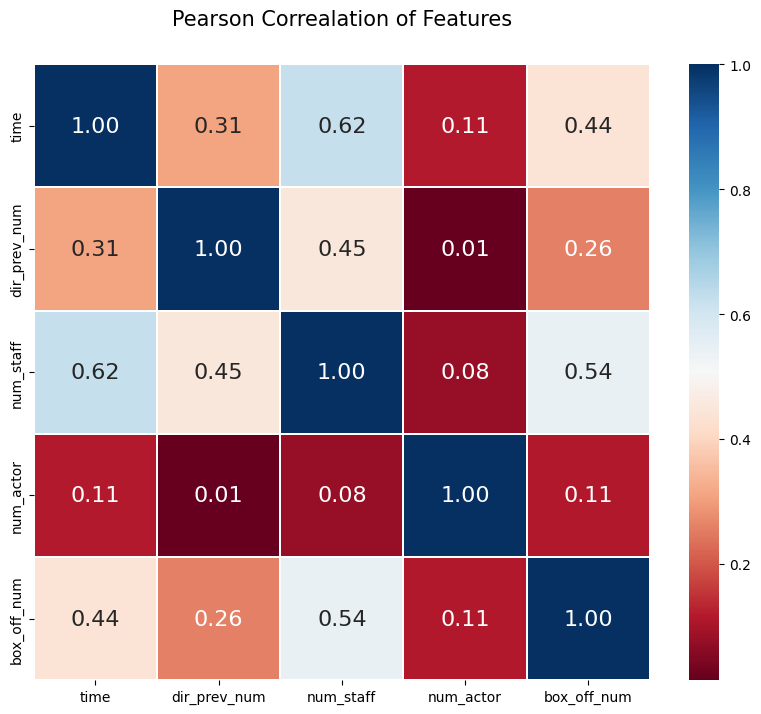

In [ ]:
# train의 변수 간 상관관계 확인
heatmap_data = train[['time','dir_prev_num','num_staff','num_actor','box_off_num']]

colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))

plt.title('Pearson Correalation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
            , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

2) 데이터 전처리

In [ ]:
# 결측치 여부 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

=> dir_prev_bfnum 칼럼에 결측치가 많음을 확인

In [ ]:
# dir_prev_bfnum이 nan인 경우 0으로 대체
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

* 상위 5개의 배급사를 제외하고 '기타'로 처리

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로 처리
distributor_list = train.distributor.value_counts()[:5]
distributor_list

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

In [ ]:
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

* 개봉일을 바탕으로 년,월 변수 생성

In [ ]:
# train data 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

In [ ]:
train

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,기타,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,2014,8
596,파파로티,(주)쇼박스,드라마,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,2013,3
597,살인의 강,(주)마운틴픽쳐스,공포,99,청소년 관람불가,김대현,0.00,0,123,4,2475,2010,9
598,악의 연대기,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,0.00,0,431,4,2192525,2015,5


In [ ]:
# test data 개봉일을 바탕으로 년,월 변수 생성
test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [ ]:
test

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,용서는 없다,기타,느와르,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2010,1
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,3.427002e+05,4,275,3,2010,1
2,하모니,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4.206611e+06,3,419,7,2010,1
3,의형제,(주)쇼박스,액션,116,15세 관람가,장훈,6.913420e+05,2,408,2,2010,2
4,평행 이론,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,3.173800e+04,1,380,1,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,기타,드라마,78,15세 관람가,안슬기,2.590000e+03,1,4,4,2015,11
239,울보 권투부,기타,다큐멘터리,86,12세 관람가,이일하,0.000000e+00,0,18,2,2015,10
240,어떤살인,기타,느와르,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4,2015,10
241,말하지 못한 비밀,기타,드라마,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7,2015,10


* 라벨 인코딩

In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
items = train[['distributor', 'genre', 'screening_rat', 'year', 'month']]

for i in items:
 train[i] = le.fit_transform(train[i])

In [ ]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,5,10,96,3,조병옥,0.00,0,91,2,23398,2,10
1,내부자들,2,2,130,3,우민호,1161602.50,2,387,3,7072501,5,10
2,은밀하게 위대하게,2,10,123,1,장철수,220775.25,4,343,4,6959083,3,5
3,나는 공무원이다,0,11,101,2,구자홍,23894.00,2,20,6,217866,2,6
4,불량남녀,4,11,108,1,신근호,1.00,1,251,2,483387,0,10


In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
items = test[['distributor','genre', 'screening_rat', 'year', 'month']]

for i in items:
 test[i] = le.fit_transform(test[i])

In [ ]:
test.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,용서는 없다,4,2,125,3,김형준,3.005290e+05,2,304,3,0,0
1,아빠가 여자를 좋아해,2,5,113,0,이광재,3.427002e+05,4,275,3,0,0
2,하모니,3,4,115,0,강대규,4.206611e+06,3,419,7,0,0
3,의형제,2,10,116,1,장훈,6.913420e+05,2,408,2,0,1
4,평행 이론,3,1,110,1,권호영,3.173800e+04,1,380,1,0,1


* 필요하지 않은 변수 제거

In [ ]:
# 필요하지 않은 변수 제거 -  title 변수와 director 변수
train = train.drop(['title', 'director'], axis=1)
train.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,5,10,96,3,0.00,0,91,2,23398,2,10
1,2,2,130,3,1161602.50,2,387,3,7072501,5,10
2,2,10,123,1,220775.25,4,343,4,6959083,3,5
3,0,11,101,2,23894.00,2,20,6,217866,2,6
4,4,11,108,1,1.00,1,251,2,483387,0,10


In [ ]:
# 필요하지 않은 변수 제거 -  title 변수와 director 변수
test = test.drop(['title', 'director'], axis=1)
test.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,4,2,125,3,3.005290e+05,2,304,3,0,0
1,2,5,113,0,3.427002e+05,4,275,3,0,0
2,3,4,115,0,4.206611e+06,3,419,7,0,0
3,2,10,116,1,6.913420e+05,2,408,2,0,1
4,3,1,110,1,3.173800e+04,1,380,1,0,1


# 04. 모델링


### 1) LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train = train.drop(['box_off_num'], axis=1, inplace=False)
y_train = train['box_off_num']
X_test = test
y_test = submission['box_off_num']


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 1942609410435.2954
rmse: 1393775.2366989793


In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-1.23152131e+12 -3.07083449e+12 -3.48799929e+12 -2.10208624e+12
 -2.73270737e+12]
5 folds의 개별 RMSE scores: [1109739.3  1752379.66 1867618.62 1449857.32 1653090.25]
5 folds의 평균 RMSE: 1566537.029


### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-1.22745882e+12 -3.07586759e+12 -3.49167842e+12 -2.09469785e+12
 -2.72935981e+12]
5 folds의 개별 RMSE scores: [1107907.408 1753815.153 1868603.333 1447307.102 1652077.423]
5 folds의 평균 RMSE: 1565942.084


### Lasso

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose: print('####### ', model_name, '#######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                     scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_train, y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=X_train.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1566537.025
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1566537.024
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1566537.003
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1566536.977
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1566536.872


### Elastic Net

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_train, y_target_n=y_train)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1566108.676
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1565937.650
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1564249.656
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1563237.743
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1564031.751


---

### LinearRegression - train 데이터 내에서 train_test_split

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

X = train.drop('box_off_num', axis=1, inplace=False)
y = train['box_off_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 1942609410435.2954
rmse: 1393775.2366989793


---
### LinearRegression - log 변환 후 모델 적합

(array([514.,  45.,  15.,   9.,   3.,   4.,   4.,   1.,   3.,   2.]),
 array([1.00000000e+00, 1.42627750e+06, 2.85255400e+06, 4.27883050e+06,
        5.70510700e+06, 7.13138350e+06, 8.55766000e+06, 9.98393650e+06,
        1.14102130e+07, 1.28364895e+07, 1.42627660e+07]),
 <BarContainer object of 10 artists>)

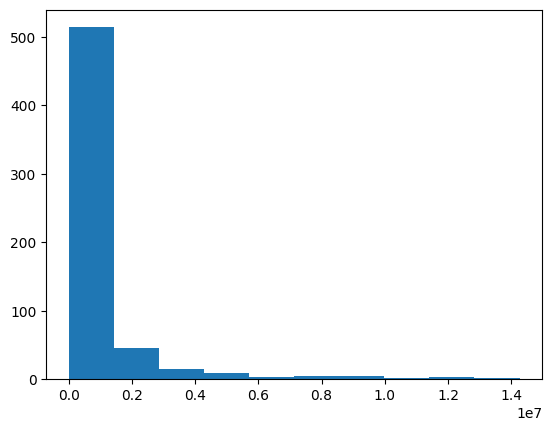

In [ ]:
plt.hist(train['box_off_num'])

(array([  3.,   3.,  25., 105., 124.,  79.,  55.,  67.,  98.,  41.]),
 array([ 0.69314718,  2.27114876,  3.84915034,  5.42715192,  7.00515351,
         8.58315509, 10.16115667, 11.73915825, 13.31715983, 14.89516141,
        16.47316299]),
 <BarContainer object of 10 artists>)

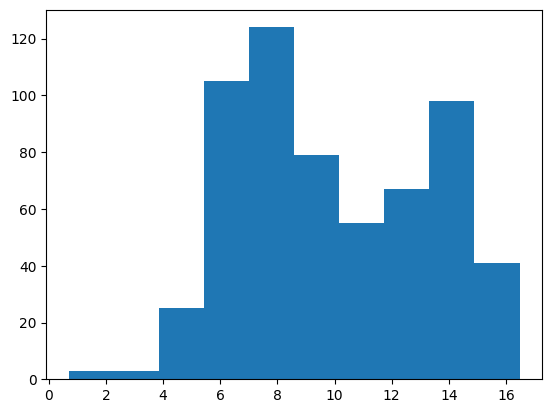

In [ ]:
train['box_off_num'] = np.log1p(train.box_off_num)
plt.hist(train['box_off_num'])

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

X = train.drop('box_off_num', axis=1, inplace=False)
y = train['box_off_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 5.514694804044214
rmse: 2.348338732816076


### 2) DecisionTree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 8.230884057697853
rmse: 2.8689517349892544


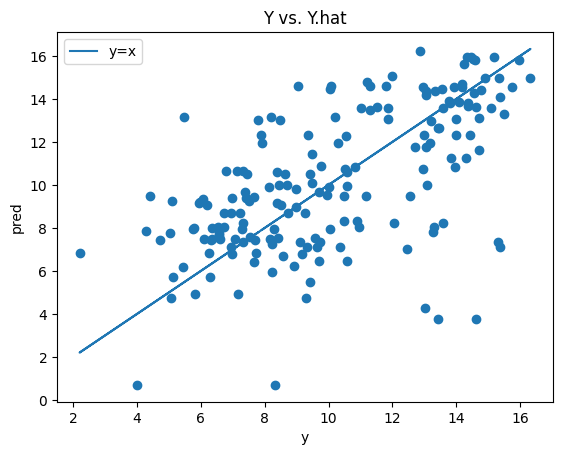

In [ ]:
plt.plot(y_test, y_test, label='y=x')
plt.scatter(y_test, pred)

plt.xlabel('y')
plt.ylabel('pred')
plt.title('Y vs. Y.hat')

plt.legend()
plt.show()

### 3) RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)

rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50)

In [ ]:
pred = rf.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 4.121312757000693
rmse: 2.0301016617402916


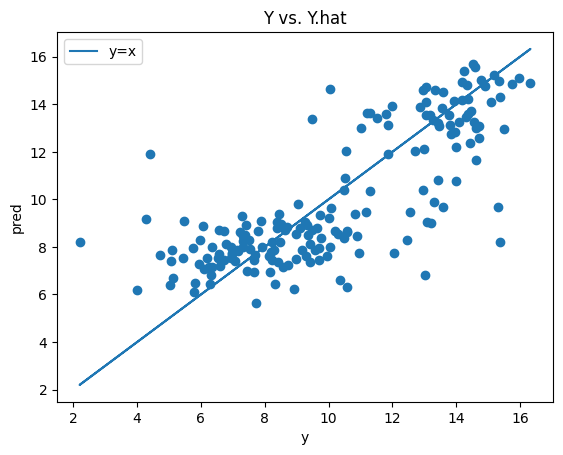

In [ ]:
plt.plot(y_test, y_test, label='y=x')
plt.scatter(y_test, pred)

plt.xlabel('y')
plt.ylabel('pred')
plt.title('Y vs. Y.hat')

plt.legend()
plt.show()

### 4) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [ ]:
pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 3.7654873602849106
rmse: 1.9404863720946124


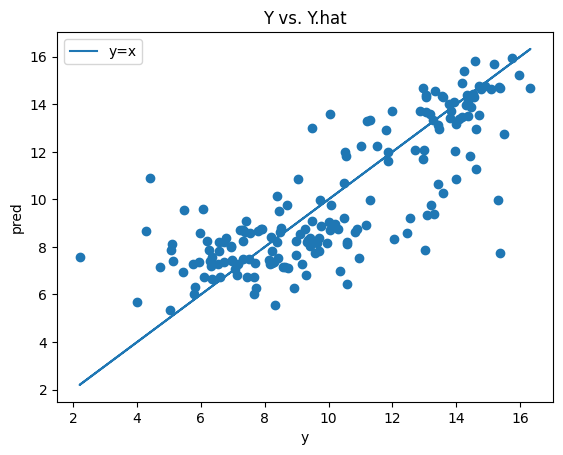

In [ ]:
plt.plot(y_test, y_test, label='y=x')
plt.scatter(y_test, pred)

plt.xlabel('y')
plt.ylabel('pred')
plt.title('Y vs. Y.hat')

plt.legend()
plt.show()

### 5) XGBoost

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import xgboost as xgb

In [ ]:
dt_clf= XGBRegressor(random_state=156)

In [ ]:
params = {'min_child_weight':[0.5,1,1.5],
          'gamma': [0,0.05,0.1,0.2, 0.3],
          'max_depth':[4,5,6,7,8,9],
          'subsample':[0.6,0.8,1],
          'n_estimators': [100,300,500]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='neg_mean_squared_error', cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 2 folds for each of 810 candidates, totalling 1620 fits
GridSearchCV 최고 평균 정확도 수치: -2305177313351.1680
GridSearchCV 최적 하이퍼 파라미터: {'gamma': 0, 'max_depth': 7, 'min_child_weight': 1.5, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
params = {'min_child_weight':[0.5,1,1.5],
          'gamma': [0,0.05,0.1,0.2, 0.3],
          'max_depth':[4,5,6,7,8,9],
          'subsample':[0.6,0.8,1],
          'n_estimators': [100,300,500]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
GridSearchCV 최고 평균 정확도 수치: nan
GridSearchCV 최적 하이퍼 파라미터: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators': 100, 'subsample': 0.6}


In [ ]:
params = {
    'n_estimators' : [150,200,250],
    'max_depth' : [4,5,6,7],
    'gamma' : [0, 1, 2],
    'eta' : [0.02, 0.03, 0.04],
    'subsample' : [0.7,0.75, 0.8],
    'mean_child_weight' : [0.9, 1, 1.1],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 2 folds for each of 972 candidates, totalling 1944 fits
GridSearchCV 최고 평균 정확도 수치: nan
GridSearchCV 최적 하이퍼 파라미터: {'eta': 0.02, 'gamma': 0, 'max_depth': 4, 'mean_child_weight': 0.9, 'n_estimators': 150, 'subsample': 0.7}


In [ ]:
params = {
    'n_estimators' : [150,200,250],
    'max_depth' : [4,5,6,7],
    'gamma' : [0, 1, 2],
    'eta' : [0.02, 0.03, 0.04],
    'subsample' : [0.7,0.75, 0.8],
    'mean_child_weight' : [0.9, 1, 1.1],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
GridSearchCV 최고 평균 정확도 수치: nan
GridSearchCV 최적 하이퍼 파라미터: {'eta': 0.02, 'gamma': 0, 'max_depth': 4, 'mean_child_weight': 0.9, 'n_estimators': 150, 'subsample': 0.7}


In [79]:
xgb_fin = XGBRegressor(eta=0.2, gamma=0,max_depth=4, mean_child_weight=0.9, n_estimators=150, subsample=0.7)


xgb_fin.fit(X_train, y_train)
xgb_pred = xgb_fin.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
print('mse:', mse)
print('rmse:', rmse)

xgb_pred_ = xgb_fin.predict(test)
submission['box_off_num']=xgb_pred_
submission.to_csv('submission_fin_2.csv', index = False)

[06:26:18] WARNING: ../src/learner.cc:767: 
Parameters: { "mean_child_weight" } are not used.

mse: 4.363108732493818
rmse: 2.088805575560784


In [ ]:
xgb_fin = XGBRegressor(eta=0.2, gamma=0,max_depth=4, min_child_weight=0.9, n_estimators=150, subsample=0.7)


xgb_fin.fit(X_train, y_train)
xgb_pred = xgb_fin.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
print('mse:', mse)
print('rmse:', rmse)

mse: 4.363108732493818
rmse: 2.088805575560784


In [ ]:
xgb_fin = XGBRegressor(gamma=0,max_depth=4, min_child_weight=0.5, n_estimators=100, subsample=0.6)


xgb_fin.fit(X_train, y_train)
xgb_pred = xgb_fin.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
print('mse:', mse)
print('rmse:', rmse)

mse: 4.631223470257031
rmse: 2.152027757780329


In [85]:
xgb_fin = XGBRegressor(gamma=1,max_depth=10, min_child_weight=1.3, n_estimators=10000, subsample=0.8)


xgb_fin.fit(X_train, y_train)
xgb_pred = xgb_fin.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
print('mse:', mse)
print('rmse:', rmse)

mse: 4.081852371615204
rmse: 2.020359465940456


In [86]:
pred1 = xgb_fin.predict(test)

pred1= np.exp(pred1)

In [87]:
pred1=np.round(pred1)

In [88]:
submission['box_off_num']=pred1
submission

,title,box_off_num
0,용서는 없다,270206.0
1,아빠가 여자를 좋아해,840620.0
2,하모니,567221.0
3,의형제,2502192.0
4,평행 이론,3215348.0
...,...,...
238,해에게서 소년에게,1528.0
239,울보 권투부,1343.0
240,어떤살인,91335.0
241,말하지 못한 비밀,3293.0


In [84]:
submission.to_csv('submission_fin_.csv', index = False)